# Importing libraires

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Exploring the malware dataset

In [2]:
malData=pd.read_csv(r"C:\Users\ashut\Desktop\Machine Learning\Input\MalwareData.csv.gz", sep="|", low_memory =True )

## Check for unique values and various types of values in the Detection Dataset
### We can note that the Name and md5 features are not really helping us in prediction if a given line is a malware or not. So, we can remove them

In [3]:
malData.nunique(axis=0)

Name                           107488
md5                            138047
Machine                             3
SizeOfOptionalHeader                5
Characteristics                   104
MajorLinkerVersion                 41
MinorLinkerVersion                 62
SizeOfCode                       3809
SizeOfInitializedData            3217
SizeOfUninitializedData           441
AddressOfEntryPoint             23110
BaseOfCode                        385
BaseOfData                       1106
ImageBase                        9099
SectionAlignment                   12
FileAlignment                       9
MajorOperatingSystemVersion        12
MinorOperatingSystemVersion        12
MajorImageVersion                  38
MinorImageVersion                  70
MajorSubsystemVersion               6
MinorSubsystemVersion              10
SizeOfImage                      2312
SizeOfHeaders                      30
CheckSum                        81633
Subsystem                           4
DllCharacter

In [4]:
## Check for null values

In [5]:
null_values = malData.isnull().sum()

# Display columns with null values and their respective counts
print(null_values)

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

## Seeing how the data looks using head

In [6]:
print("Dataset for first five elements looks like: -\n")
print(malData.head())
print("\n\n The shape of the dataset is as: -")
print(malData.shape)
print("\n\n The dataset description looks like: -")
print(malData.describe())

Dataset for first five elements looks like: -

           Name                               md5  Machine  \
0   memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1       ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2     setup.exe  4d92f518527353c0db88a70fddcfd390      332   
3      DW20.EXE  a41e524f8d45f0074fd07805ff0c9b12      332   
4  dwtrig20.exe  c87e561258f2f8650cef999bf643a731      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   
3                   224              258                   9   
4                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2              

## Looking at how balanced the dataset is based on target feature @Legitimate

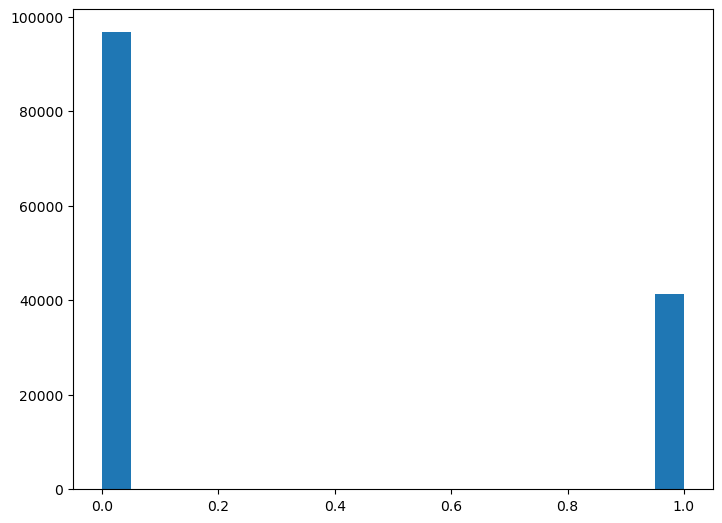

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(malData['legitimate'],20)
plt.show()

## Data Cleaning and Train Test Set Creation

In [8]:
#Define target
dfY = malData['legitimate']

#Remove unwanted columns
malData=malData.drop(['Name'],axis=1)
malData=malData.drop(['md5'],axis=1)

#Define Descriptive Features
dfX = malData.drop(['legitimate'],axis=1)

#Based on experimentation and careful considerations below columns are choosen
cols = ['DllCharacteristics', 'Characteristics', 'Machine', 'VersionInformationSize', 'SectionsMaxEntropy', 'Subsystem', 'ImageBase', 'MajorSubsystemVersion', 'ResourcesMinEntropy', 'SizeOfOptionalHeader', 'ResourcesMaxEntropy', 'SectionsMinEntropy', 'MajorOperatingSystemVersion', 'SectionsMeanEntropy']
dfX = malData[cols]

#Split Dataset
X_train, X_test, Y_train, Y_test = train_test_split(dfX,dfY, test_size=0.2, random_state=42)

# Model Building </br> </br>
## 1- Random Forest

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
random_forest.fit(X_train, Y_train)

# Making predictions on the test set
predictions = random_forest.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9945671858022456


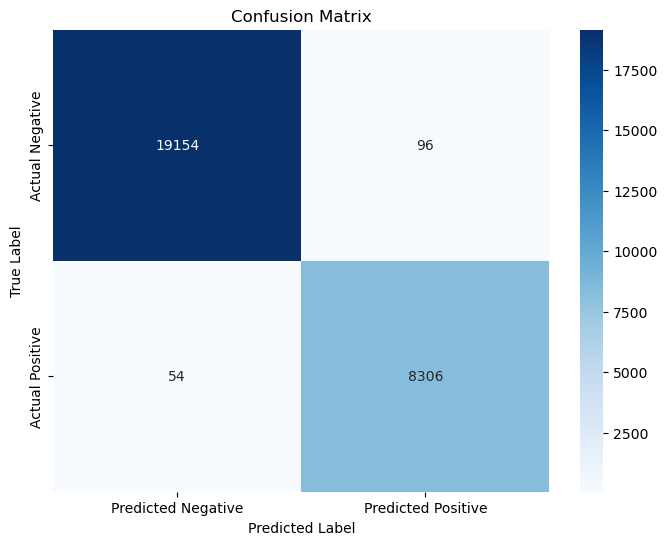

In [10]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 2- KNN

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)  # For example, using 5 neighbors

# Fitting the model to the training data
knn.fit(X_train, Y_train)

# Making predictions on the test set
predictions = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9898225280695401


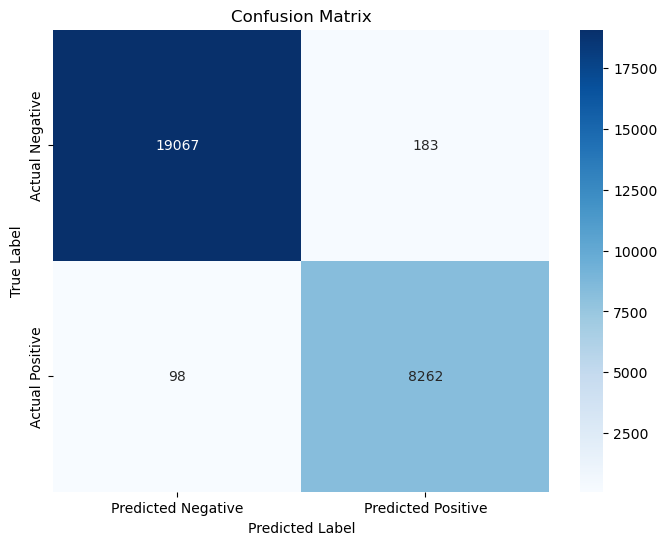

In [12]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 3- Decision Tree

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42,max_depth=10)

# Fitting the model to the training data
decision_tree.fit(X_train, Y_train)

# Making predictions on the test set
predictions = decision_tree.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9912712785222746


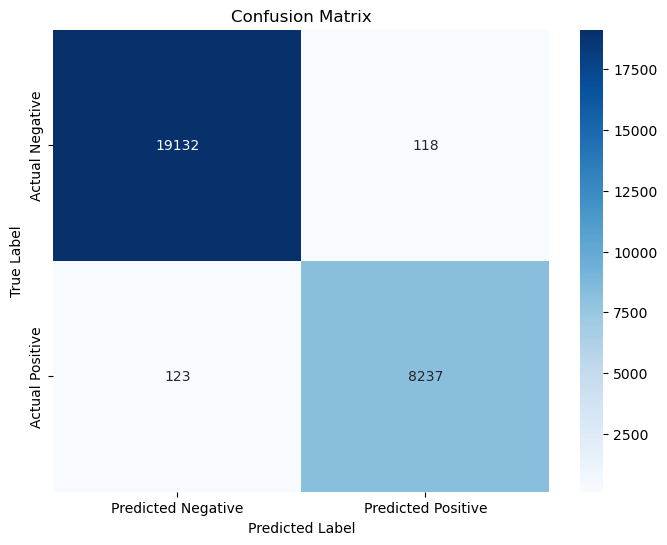

In [14]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 4- Logistic Regression 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
#logistic_regression = LogisticRegression(random_state=42)

# Fitting the model to the training data
logistic_regression.fit(X_train, Y_train)

# Making predictions on the test set
predictions = logistic_regression.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6972111553784861


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


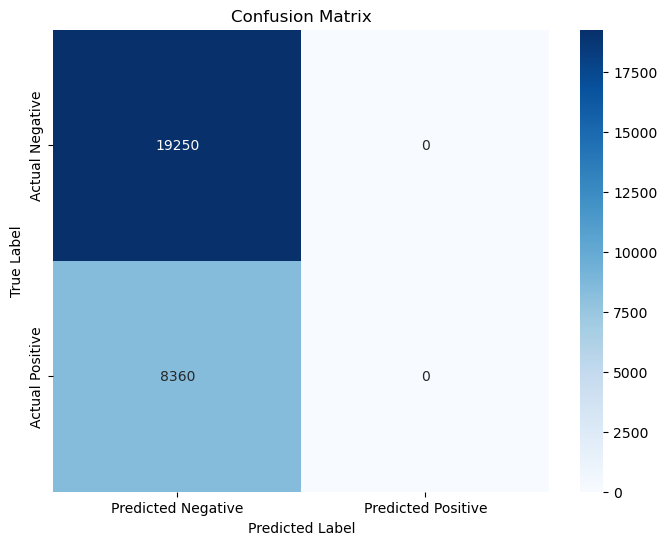

In [16]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 5- Neural Networks

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define model
model = Sequential()
model.add(Dense(16, input_dim=14, activation= "relu"))
model.add(Dense(8, activation= "relu"))
model.add(Dense(4, activation= "relu"))
model.add(Dense(1, activation='sigmoid'))
model.summary() #Print model Summary

# Compile model
model.compile(loss= "binary_crossentropy" , optimizer="rmsprop", metrics=["accuracy"])

# Fit Model
model.fit(X_train, Y_train, epochs=5, batch_size=32)

prediction = model.predict(X_test)
prediction = [1 if y>= 0.5 else 0   for y in prediction]

# Evaluating the model
accuracy = accuracy_score(Y_test, prediction)
print(f"Accuracy: {accuracy}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 417 (1.63 KB)
Trainable params: 417 (1.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
3452/3452 [==============================] - 5s 1ms/step - loss: 12685436.0000 - accuracy: 0.4215
Epoch 2/5
3452/3452 [=============================

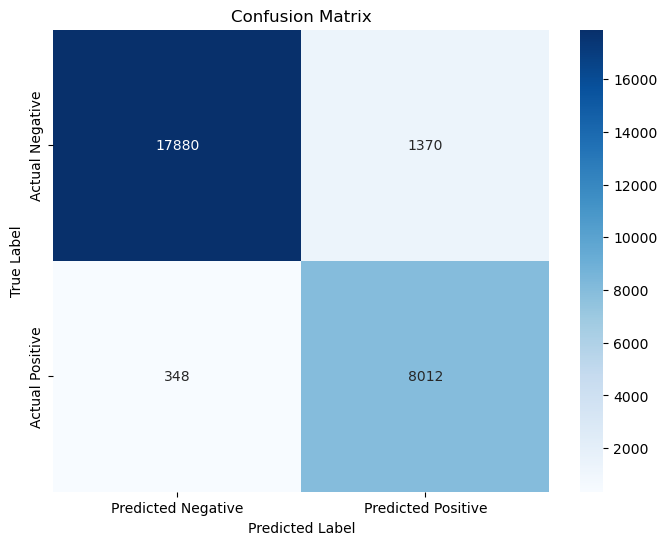

In [18]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix
conf_matrix = confusion_matrix(Y_test, prediction)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()